In [7]:
from fastai.text import *
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2

In [8]:
pd.set_option('display.max_colwidth',-1)

<ipython-input-8-dc5dda32fe3d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [9]:
text_path = "../dataset/title_StackOverflow.txt"
label_path="../dataset/label_StackOverflow.txt"

In [14]:
df_text = pd.read_csv(text_path,sep="\t",names=["text"],header=None)
df_label = pd.read_csv(label_path,sep="\t",names=["label"],header=None)

df = pd.concat([df_label,df_text],axis=1,sort=False)

In [15]:
print("Length of dataset: "+str(len(df.index)))

Length of dataset: 20000


In [16]:
df.head()

,label,text
0,18,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,18,How do you page a collection with LINQ?
2,3,Best Subversion clients for Windows Vista (64bit)
3,3,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,7,Visual Studio Setup Project - Per User Registry Settings


In [17]:
mapping = {
  1: 'wordpress',
  2: 'oracle',
  3: 'svn',
  4: 'apache',
  5: 'excel',
  6: 'matlab',
  7: 'visual-studio',
  8: 'cocoa',
  9: 'osx',
  10: 'bash',
  11: 'spring',
  12: 'hibernate',
  13: 'scala',
  14: 'sharepoint',
  15: 'ajax',
  16: 'qt',
  17: 'drupal',
  18: 'linq',
  19: 'haskell',
  20: 'magento'
}
df['label'] = df['label'].map(mapping)
df.head()

,label,text
0,linq,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,linq,How do you page a collection with LINQ?
2,svn,Best Subversion clients for Windows Vista (64bit)
3,svn,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,visual-studio,Visual Studio Setup Project - Per User Registry Settings


## Creating training and validation datasets 

In [18]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(df,stratify=df['label'],test_size=0.3)

In [19]:
print("Shape of Training data is {0} and Testing data is {1}".format(df_trn.shape,df_val.shape))

Shape of Training data is (14000, 2) and Testing data is (6000, 2)


In [21]:
# Creating data bunch
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn,valid_df=df_val,path="")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn,valid_df = df_val, path="",vocab=data_lm.train_ds.vocab,bs=32)

In [24]:
data_clas.show_batch()

text,target
"xxbos xxmaj in apache , if i go to https : / / xxunk , the page itself is over https , but all images / links are http : / / . xxmaj is there way to auto rewrite the html so its all https : / / ?",apache
"xxbos xxmaj why do i receive a "" xxmaj out of xxmaj windows xxmaj resources "" warning when i open numerous figure windows in xxup matlab [ xxunk ( xxup xxunk ) and beyond ] on a xxmaj microsoft xxmaj windows xxup pc ?",matlab
xxbos xxmaj what 's the best way to find if the processor type is xxup ppc or xxmaj intel in xxmaj cocoa ? ( xxmaj do i have to use xxmaj carbon ? ),osx
xxbos how to select k no . of nodes with probability xxunk xxunk ) out of xxunk xxunk ) randomly generated nodes and those k nodes shown as red colored in whole figure ?,matlab
xxbos xxmaj need xxmaj help xxmaj with xxup ajax - xxmaj enabled xxup wcf xxmaj services ( xxmaj please xxmaj look @ xxmaj system . xxunk in xxmaj web . xxmaj config ),ajax


# Training the Model

In [25]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 7.59E-02


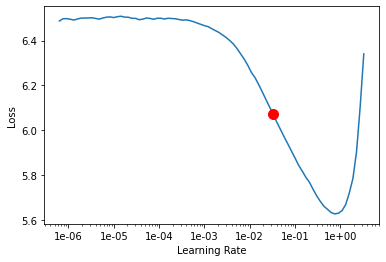

In [26]:
# finding optimal learning rate by lr_find() function which runs for few epochs and plots loss
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [27]:
learn.fit_one_cycle(2,min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.842728,4.060871,0.313642,00:13
1,4.140816,3.943508,0.324856,00:14


In [28]:
# Unfreezing weights and training NN
learn.unfreeze()
learn.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.563076,3.820543,0.338603,00:18
1,3.394532,3.819445,0.338655,00:19


In [30]:
learn.predict("How do",n_words=10)

'How do i reference scaladoc by Visual Studio and'

In [31]:
learn.save_encoder('ft_enc')

ft_enc.pth  tmp.pth
